In [1]:
import pyaudio
import numpy as np
import math

CHUNK = 4096
RATE = 44100  # サンプリングレート [Hz]


# 半音上がる際の周波数変化割合
r_semitone = math.pow(2, 1.0/12)
# ド〜ドの12+1音階の周波数
scale_hz = [261.625]
for _ in range(12):
    scale_hz.append(scale_hz[-1] * r_semitone)


def tone(freq, length, gain):
    """
    指定した周波数の定常波を作成

    Parameters
    ----------
    freq : 周波数 [Hz]
    length : 長さ [s]
    gain : 大きさ
    """
    slen = int(length * RATE)
    t = float(freq) * np.pi * 2 / RATE
    return np.sin(np.arange(slen) * t) * gain

def play_sound(output_stream, sound):
    """
    音を鳴らす
    """
    output_stream.write(sound)
    return

def chord(freqs, length, gain):
    """
    和音
    
    Parameters
    ---------
    freqs : 組み合わせたい周波数のリスト
    length : 長さ [s]
    gain : 大きさ
    """
    slen = int(length * RATE)
    result = np.zeros(slen)
    for freq in freqs:
        t = float(freq) * np.pi * 2 / RATE
        result += np.sin(np.arange(slen) * t) * gain
    return result

In [ ]:
sounds = [
    ( tone(scale_hz[0], 2, 1.0).astype(np.float32) ).tostring(),#ド
    ( tone(scale_hz[4], 2, 1.0).astype(np.float32) ).tostring(),#ミ
    ( tone(scale_hz[7], 2, 1.0).astype(np.float32) ).tostring(),#ソ
    ( tone(scale_hz[0], 2, 1.0).astype(np.float32) + tone(scale_hz[4], 2, 1.0).astype(np.float32) + tone(scale_hz[7], 2, 1.0).astype(np.float32) ).tostring()#C
]
for sound in sounds:
    play_sound(stream_out, sound)

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pylab

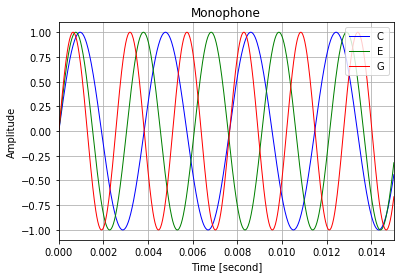

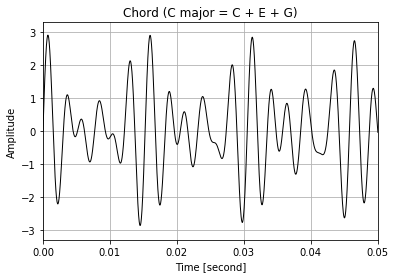

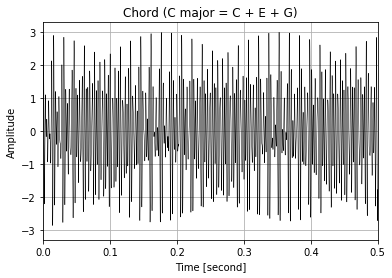

In [50]:
LENGTH = 1.0
t = np.arange(int(LENGTH * RATE)) / RATE

plt.title('Monophone')
plt.xlim([0, 0.015])
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.plot(x, tone(scale_hz[0], LENGTH, 1.0), color='blue', linewidth=1.0, label='C')
plt.plot(x, tone(scale_hz[4], LENGTH, 1.0), color='green', linewidth=1.0, label='E')
plt.plot(x, tone(scale_hz[7], LENGTH, 1.0), color='red', linewidth=1.0, label='G')
plt.legend(loc='upper right')
plt.show()


plt.title('Chord (C major = C + E + G)')
plt.xlim([0, 0.05])
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.plot(x, chord([scale_hz[0], scale_hz[4], scale_hz[7]], LENGTH, 1.0), color='black', linewidth=1.0)
plt.show()

plt.title('Chord (C major = C + E + G)')
plt.xlim([0, 0.5])
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.plot(x, chord([scale_hz[0], scale_hz[4], scale_hz[7]], LENGTH, 1.0), color='black', linewidth=0.5)
plt.show()

In [1]:
import pyaudio
import numpy as np
import math

SECONDS = 10  # 録音する秒数
CHUNK = 1024  # 音源から1回読み込むときのデータサイズ
RATE = 44100  # サンプリング周波数
FORMAT = pyaudio.paInt16

# 半音上げるための周波数の変換倍率
R12 = math.pow(2, 1.0/12)

p = pyaudio.PyAudio()
stream_in = p.open(
    format = FORMAT,
    channels = 1,  # モノラル
    rate = RATE,
    frames_per_buffer = CHUNK,
    input = True
)
stream_out = p.open(
    format = FORMAT, # int だと質が悪い？ paFloat32 にするとキレイな音に
    channels = 1,
    rate = RATE,  # そのままの高さ
    #rate = int(RATE*R12),  # 高くする
    #rate = int(RATE/R12),  # 低くする
    frames_per_buffer = CHUNK,
    output = True
)

print('----- Start recording -----')

frames = []
for i in range(0, int(RATE / CHUNK * SECONDS)):
    data = stream_in.read(CHUNK, exception_on_overflow = False)
    frames.append(data)

print('----- Finish recording -----')

len(frames)
# 430
len(frames[0])
# 2048
len(np.frombuffer(frames[0], dtype=np.int16))
# 1024

result = np.frombuffer(b''.join(frames), dtype=np.int16)
len(result)
# 440320

from matplotlib import pyplot as plt
t = np.arange(len(result)) / RATE

plt.title('Input from Microphone')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.plot(t, result, color='black', linewidth=1.0)
plt.show()

plt.title('Input from Microphone')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.xlim([1.27, 1.29])
plt.plot(t, result, color='black', linewidth=1.0)
plt.show()

# 取り込んだ音声を再生
stream_out.write(result.tostring())

for i in range(int(len(result) / RATE)):
    stream_out.write(result[RATE*i:RATE*(i+1)].tostring())


----- Start recording -----
----- Finish recording -----


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

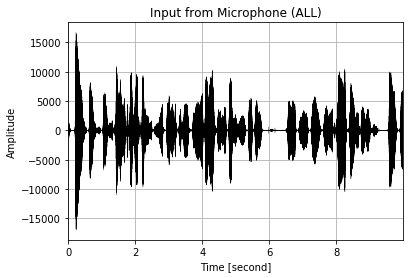

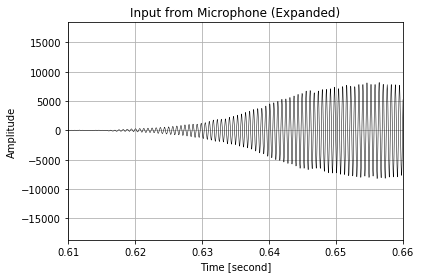

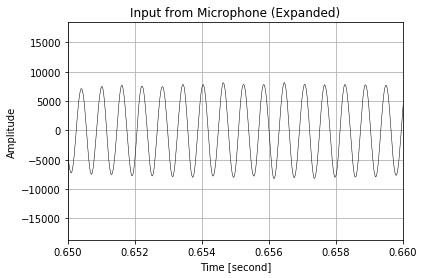

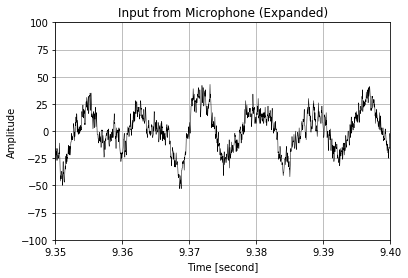

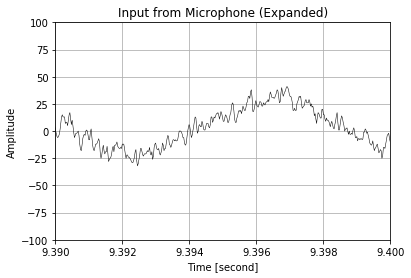

In [12]:
import numpy as np
result = np.load('/Users/hkawabat/workspace/private/jupyter/input_sound.npy')

%matplotlib inline
from matplotlib import pyplot as plt

RATE = 44100
t = np.arange(len(result)) / RATE

plt.title('Input from Microphone (ALL)')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.xlim([t[0], t[-1]])
plt.plot(t, result, color='black', linewidth=0.2)
plt.show()

plt.title('Input from Microphone (Expanded)')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.xlim([0.61, 0.66])
plt.plot(t, result, color='black', linewidth=0.5)
plt.show()

plt.title('Input from Microphone (Expanded)')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.xlim([0.65, 0.66])
plt.plot(t, result, color='black', linewidth=0.5)
plt.show()

plt.title('Input from Microphone (Expanded)')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.xlim([9.35, 9.4])
plt.ylim([-100, 100])
plt.plot(t, result, color='black', linewidth=0.5)
plt.show()

plt.title('Input from Microphone (Expanded)')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.xlim([9.39, 9.4])
plt.ylim([-100, 100])
plt.plot(t, result, color='black', linewidth=0.5)
plt.show()

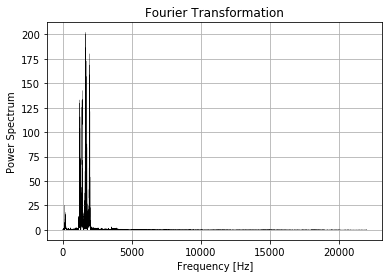

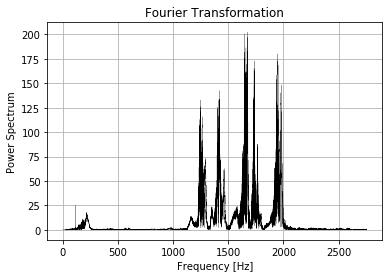

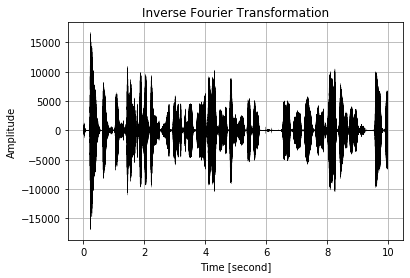

In [16]:
num_data = len(result)
F = np.fft.fft(result)
F_abs = np.abs(F) / num_data * 2
fq = np.linspace(0, RATE, num_data)

plt.title('Fourier Transformation')
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectrum')
plt.plot(fq[:int(num_data/2)], F_abs[:int(num_data/2)], color='black', linewidth=0.2)
plt.show()

plt.title('Fourier Transformation')
plt.grid()
plt.ylabel('Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.plot(fq[:int(num_data/16)], F_abs[:int(num_data/16)], color='black', linewidth=0.2)
plt.show()

IF = np.fft.ifft(F)
t = np.arange(len(result)) / RATE
plt.title('Inverse Fourier Transformation')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.plot(t, IF.real, color='black', linewidth=0.2)
plt.show()

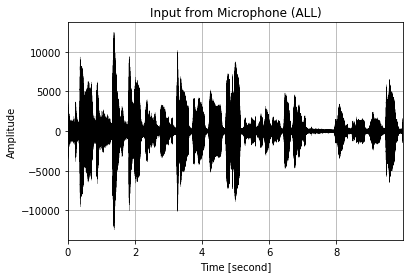

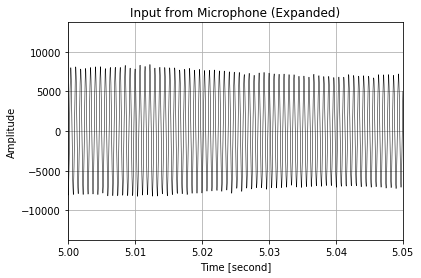

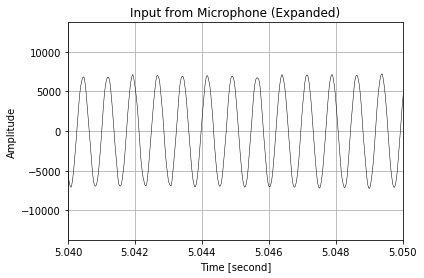

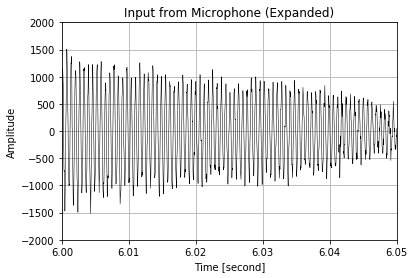

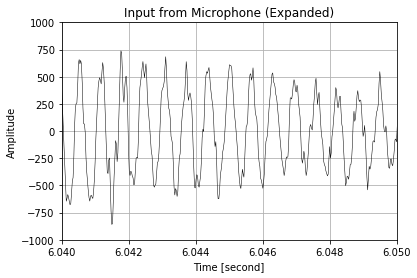

In [17]:
import numpy as np
result = np.load('/Users/hkawabat/workspace/private/jupyter/input_sound_noise.npy')

%matplotlib inline
from matplotlib import pyplot as plt

RATE = 44100
t = np.arange(len(result)) / RATE

plt.title('Input from Microphone (ALL)')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.xlim([t[0], t[-1]])
plt.plot(t, result, color='black', linewidth=0.2)
plt.show()

plt.title('Input from Microphone (Expanded)')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.xlim([5, 5.05])
plt.plot(t, result, color='black', linewidth=0.5)
plt.show()

plt.title('Input from Microphone (Expanded)')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.xlim([5.04, 5.05])
plt.plot(t, result, color='black', linewidth=0.5)
plt.show()

plt.title('Input from Microphone (Expanded)')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.xlim([6, 6.05])
plt.ylim([-2000, 2000])
plt.plot(t, result, color='black', linewidth=0.5)
plt.show()

plt.title('Input from Microphone (Expanded)')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.xlim([6.04, 6.05])
plt.ylim([-1000, 1000])
plt.plot(t, result, color='black', linewidth=0.5)
plt.show()

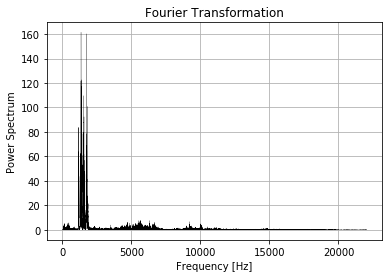

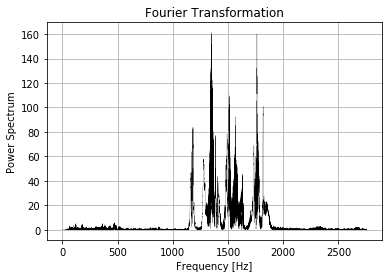

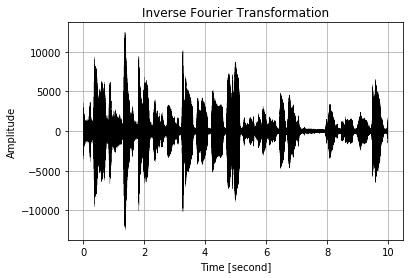

In [18]:
num_data = len(result)
F = np.fft.fft(result)
F_abs = np.abs(F) / num_data * 2
fq = np.linspace(0, RATE, num_data)

plt.title('Fourier Transformation')
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectrum')
plt.plot(fq[:int(num_data/2)], F_abs[:int(num_data/2)], color='black', linewidth=0.2)
plt.show()

plt.title('Fourier Transformation')
plt.grid()
plt.ylabel('Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.plot(fq[:int(num_data/16)], F_abs[:int(num_data/16)], color='black', linewidth=0.2)
plt.show()

IF = np.fft.ifft(F)
t = np.arange(len(result)) / RATE
plt.title('Inverse Fourier Transformation')
plt.grid()
plt.xlabel('Time [second]')
plt.ylabel('Amplitude')
plt.plot(t, IF.real, color='black', linewidth=0.2)
plt.show()

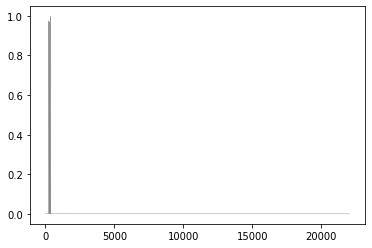

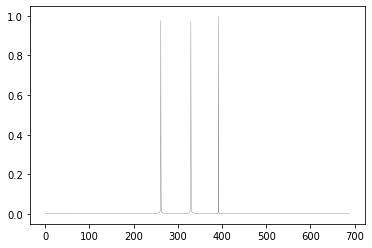

In [6]:
import math
r_semitone = math.pow(2, 1.0/12)
# ド〜ドの12+1音階の周波数
scale_hz = [261.625]
for _ in range(12):
    scale_hz.append(scale_hz[-1] * r_semitone)
def chord(freqs, length, gain):
    """
    和音
    
    Parameters
    ---------
    freqs : 組み合わせたい周波数のリスト
    length : 長さ [s]
    gain : 大きさ
    """
    slen = int(length * RATE)
    result = np.zeros(slen)
    for freq in freqs:
        t = float(freq) * np.pi * 2 / RATE
        result += np.sin(np.arange(slen) * t) * gain
    return result

result = chord([scale_hz[0], scale_hz[4], scale_hz[7]], 5.0, 1.0)
num_data = len(result)
F = np.fft.fft(result)
F_abs = np.abs(F) / num_data * 2
fq = np.linspace(0, RATE, num_data)
plt.plot(fq[:int(num_data/2)], F_abs[:int(num_data/2)], color='black', linewidth=0.2)
plt.show()
plt.plot(fq[:int(num_data/64)], F_abs[:int(num_data/64)], color='black', linewidth=0.2)
plt.show()

# フーリエ変換

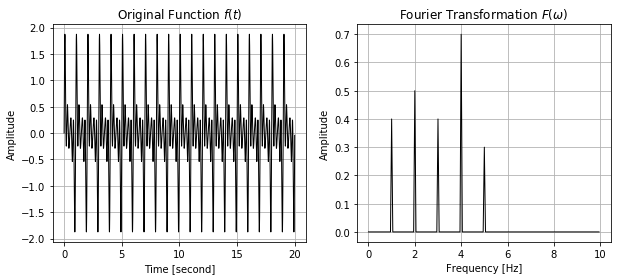

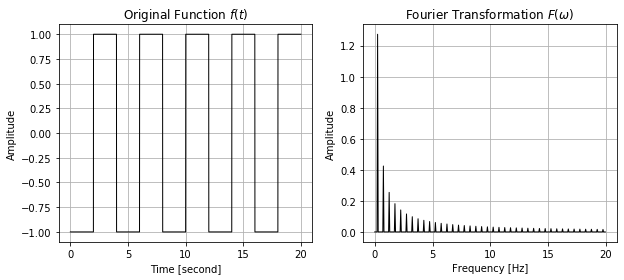

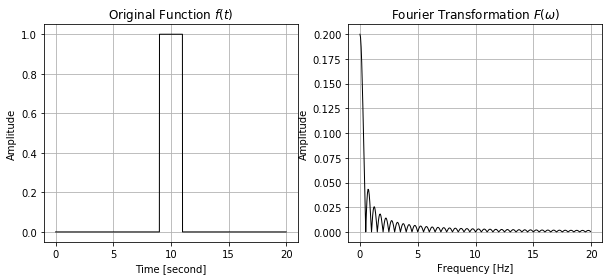

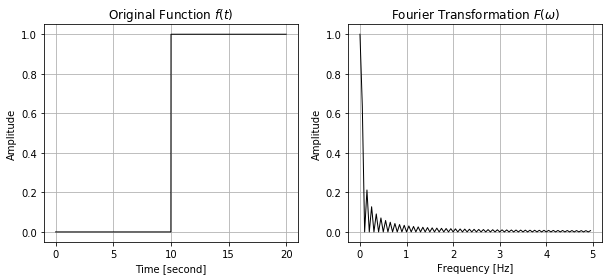

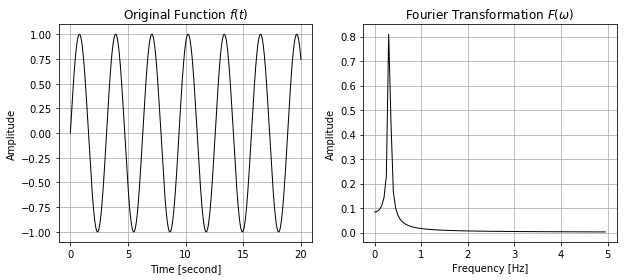

In [5]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

dt = 0.001
MAX = 20
N = int(MAX / dt)
t = np.arange(N) * dt
fq = np.linspace(0, int(1.0/dt), N)
angular_fq = fq * 2 * np.pi

def draw_fft(f, ft_graph_scale=0.5):
    F = np.fft.fft(f)
    F_abs = np.abs(F) / N * 2
    # 元関数
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    axL.set_title('Original Function $f(t)$')
    axL.grid()
    axL.set_xlabel('Time [second]')
    axL.set_ylabel('Amplitude')
    axL.plot(t, f, color='black', linewidth=1)
    # Fourier 変換
    axR.set_title('Fourier Transformation $F(\omega)$')
    axR.grid()
    axR.set_xlabel('Frequency [Hz]')
    axR.set_ylabel('Amplitude')
    axR.plot(fq[:int(N*ft_graph_scale)], F_abs[:int(N*ft_graph_scale)], color='black', linewidth=1)
    # 描画
    plt.show()

f1 = np.zeros(N)
for fq_, amp in [(1.0, 0.4), (2.0, 0.5), (3.0, 0.4), (4.0, 0.7), (5.0, 0.3)]:
    f1 += np.sin(fq_ * 2 * np.pi * t) * amp

f2 = np.zeros(N)
for i in range(N):
    #if N/4 <= i < N/2 or 3*N/4 <= i < N:
    if int(10*i/N) % 2 == 1:
        f2[i] = 1
    else:
        f2[i] = -1

f3 = np.zeros(N)
for i in range(N):
    if 9*N/20 < i < 11*N/20:
        f3[i] = 1

f4 = np.zeros(N)
for i in range(N):
    if N/2 <= i:
        f4[i] = 1

f5 = np.sin(2*t)

f6 = np.abs(np.sin(2*t))

f7 = np.sin(2*t) + 0.5 * np.random.randn(N)

f8 = np.sin(2*t) + 0.05 * np.random.randn(N)

f9 = np.sin(2*t) + 0.1 * np.sin(19*t)

f10 = np.sin(2*t) + 0.1 * np.sin(37*t) + 0.2 * np.sin(101*t)

draw_fft(f1, 0.01)
draw_fft(f2, 0.02)
draw_fft(f3, 0.02)
draw_fft(f4, 0.005)
draw_fft(f5, 0.005)


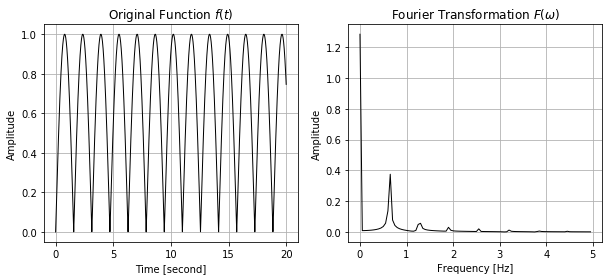

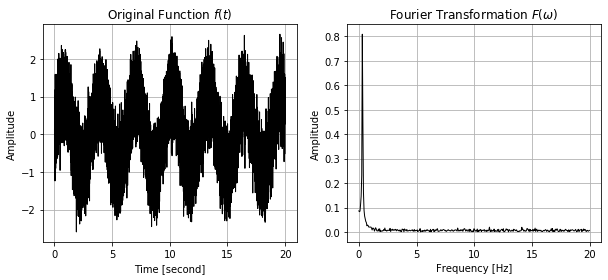

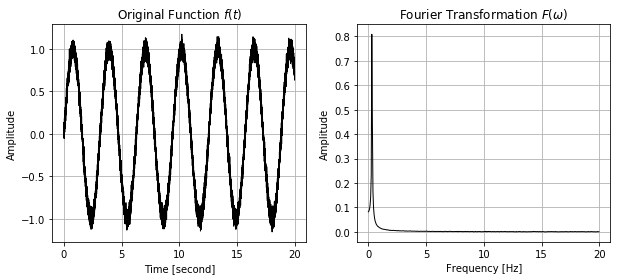

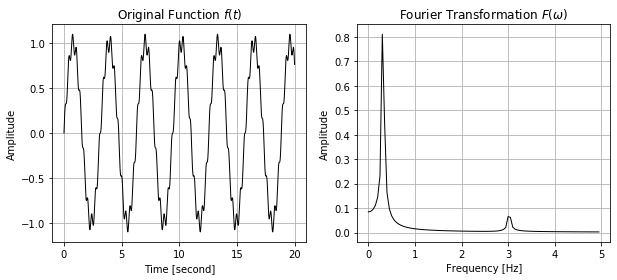

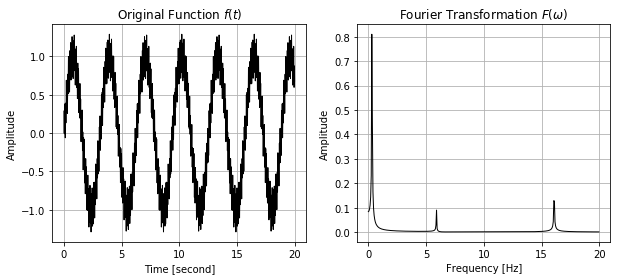

In [66]:
draw_fft(f6, 0.005)
draw_fft(f7, 0.02)
draw_fft(f8, 0.02)
draw_fft(f9, 0.005)
draw_fft(f10, 0.02)